In [2]:
!unzip '/content/drive/My Drive/word2vec_model.zip'

Archive:  /content/drive/My Drive/word2vec_model.zip
  inflating: word2vec.model          
  inflating: word2vec.model.wv.vectors.npy  
  inflating: word2vec.model.trainables.syn1neg.npy  


## Import Pre-Trained model with the documents


In [9]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

w2v_model = Word2Vec.load("/content/word2vec.model")

## With given Lexicons, create vocab list that is compatible with word2vec format

In [10]:
conflict = pd.read_excel('/content/enh_conflict_lexicon.xlsx')
peace = pd.read_excel('/content/enh_peace_lexicon.xlsx')
resilence = pd.read_excel('/content/enh_resilience_lexicon.xlsx')
conflict['label'] = 'conflict'
peace['label'] = 'peace'
resilence['label'] = 'resilence'
conflict = conflict.loc[:,['Term', 'label']]
peace['Term'] = peace['academic freedom']
peace = peace.loc[:,['Term', 'label']]
resilence = resilence.loc[:,['Term', 'label']]

vocab_df = conflict.copy()
vocab_df = vocab_df.append(peace)
vocab_df = vocab_df.append(resilence)
vocab_df.index = np.arange(0, len(vocab_df))

In [39]:
vocab_df['vocab'] = vocab_df['Term'].str.lower()
vocab_df['vocab'] = vocab_df['vocab'].str.split(' ')
vocab_df['len'] = [len(vocab_df['vocab'][i]) for i in range(len(vocab_df))]
vocab_df = vocab_df[vocab_df['len'] <3]
vocab_df.index = np.arange(0,len(vocab_df))
vocab_df['vocab'] = ['_'.join(vocab_df['vocab'][i]) for i in range(len(vocab_df))]

In [40]:
vocab_df['vector'] = ''

for i in range(len(vocab_df)):
  try:
    vocab_df['vector'][i] = w2v_model[vocab_df['vocab'][i]]
  except:
    pass

vocab_df = vocab_df[vocab_df['vector'] != '']
vocab_df.index = np.arange(0,len(vocab_df))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
vocab_df

,Term,label,vocab,len,vector
0,Armageddon,conflict,armageddon,1,"[-0.08862107, -0.023545297, -0.1273068, -0.033..."
1,Rogue,conflict,rogue,1,"[-0.10189713, -0.15588753, -0.12267564, -0.065..."
2,ache,conflict,ache,1,"[0.009730959, -0.04618927, -0.10700147, 0.0086..."
3,adverse,conflict,adverse,1,"[-0.030947648, -0.056069218, 0.12635317, -0.05..."
4,adversely,conflict,adversely,1,"[-0.008911088, -0.052702155, -0.06510404, -0.0..."
...,...,...,...,...,...
1070,truthfully,resilence,truthfully,1,"[-0.05832547, 6.9406844e-05, 0.0045384155, -0...."
1071,truthfulness,resilence,truthfulness,1,"[-0.0359938, 0.04752362, 0.0125643965, 0.02261..."
1072,unite,resilence,unite,1,"[0.071103774, 0.066281416, -0.085619085, -0.05..."
1073,united,resilence,united,1,"[0.0032406885, 0.0335175, -0.051060226, 0.0385..."


## Visualization with TSNE (dimension reduction)

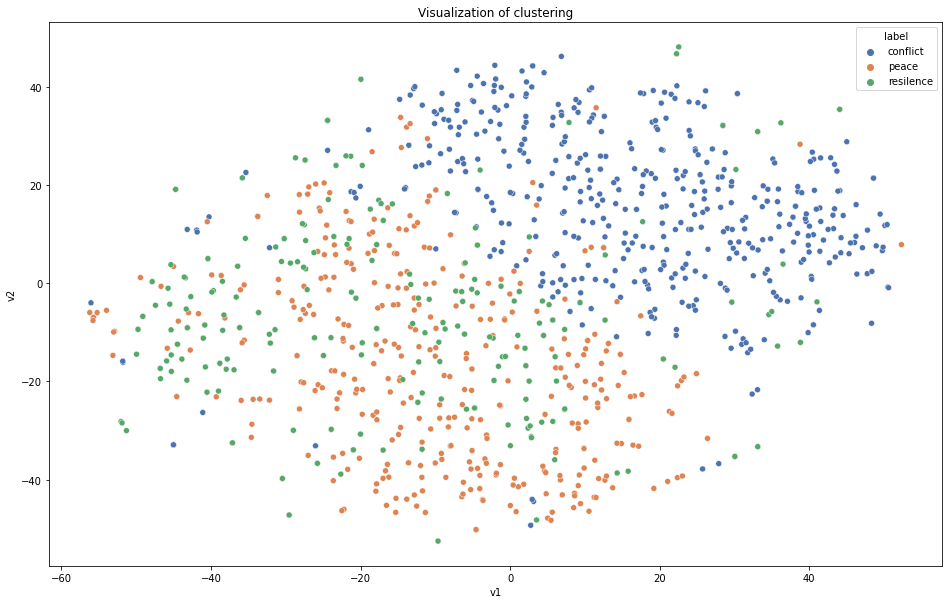

In [48]:
from sklearn.cluster import AgglomerativeClustering


#model = AgglomerativeClustering(n_clusters=2)
#yhat = model.fit_predict(X)

from sklearn.manifold import TSNE

X = list(vocab_df['vector'])
label = vocab_df['label']
df_clustering_label = TSNE(n_components = 2, random_state = 42).fit_transform(X)

import matplotlib.pyplot as plt
import seaborn as sns
def creat_plotting_data(data,labels):
    """Creates a dataframe from the given data, used for plotting"""
    
    df = pd.DataFrame(data)
    df["label"] = labels
    df.rename({0:"v1", 1:"v2"}, axis=1, inplace=True)
    return df


plotting_data_embedded = creat_plotting_data(df_clustering_label,label)
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x="v1", y="v2", hue = 'label',data=plotting_data_embedded, palette="deep")
ax.set(title = 'Visualization of clustering')
plt.show()